In [172]:
import os
import numpy as np
import matplotlib.pyplot as plt

In [173]:
dirslist = os.listdir('.')
print(dirslist)

['g.txt', 'i.txt', 'ktype.txt', 'y.txt', '.ipynb_checkpoints', 'r.txt', 'u.txt', 'FilterTransmission.ipynb', 'z.txt']


In [299]:
def filterExtraction(grain=0.1,filters=['u.txt','g.txt', 'r.txt', 'i.txt', 'z.txt','y.txt']):
    #filters = ['g.txt', 'i.txt', 'y.txt', 'r.txt', 'u.txt', 'z.txt']
    filtTransX = []
    filtTransY = []
    for Filt in range(len(filters)):
        f = open(filters[Filt],'r')
        g = f.read()
        gloop = g
        gloopog = g
        x = []
        y = []
        no = 0
        while gloop.find('\n') != -1:# and no<100:
            no += 1
            loc1 = gloop.find(',')
            if no == 0:
                x.append((gloop[1:loc1]))
            else:
                x.append((gloop[0:loc1]))
            #append((gloopog[loc2:loc1]))
            loc2 = gloop.find('\n')
            y.append(gloop[loc1+2:loc2])
        #     print(gloop[loc1+2:loc2])
        #     print(gloop[loc2:])
            gloop = gloop[loc2+1:]
        #print(len(x))
        #print(len(y))

        x = x[0:len(x)-1]
        y = y[0:len(y)-1]
        x = [float(z) for z in x]
        y = [float(z) for z in y]
        y = [a for _,a in sorted(zip(x,y))]
        x = sorted(x)
#         if filters[Filt] == 'u.txt':
#             print('x',x)
#             print('y',y)
        plt.plot(x,y)
        length = int((x[-1]-x[0])/grain)
        newX = []
        for s in range(length):
            newX.append(x[0]+(grain*s))
        #print(np.log10(1/grain))
        newX = [round(t,int(np.log10(1/grain))) for t in newX]
        oldX = [round(t,int(np.log10(1/grain))) for t in x]
        positions = []
        for s in range(len(oldX)):
            try:
                positions.append(newX.index(oldX[s]))
            except ValueError:
                pass
        m = []
        positions.append(len(newX))
        #for s in range(len(positions)):
            #print(positions[s])
            #plt.plot(newX[positions[s]],y[s],'o')

        #plt.plot(x,y)
        for s in range(len(x)-1):
            m.append((y[s+1]-y[s])/(x[s+1]-x[s])) ##  or here
#         for s in range(len(x)):
#             if s == 0:
#                 newnewy = [y[0]]
#             else:
#                 newnewy.append((m[s-1]*(x[s]-x[s-1]))+y[s])
            #plt.plot((y[s+1]-y[s])/(x[s+1]-x[s]))
        #newY = [y[0]]
        #plt.plot(x,newnewy)
        newY = []
        starter = 1
        recorded = []
        #print(positions)
        #print(len(positions),len(y),len(m))
        #print(y)
        #print(m)
        for s in range(len(newX)):
            checker = 0
            if s == 0:
                newY = [y[0]]
            else:
                for pos in range(len(positions)):
                    if s >= positions[pos] and s < positions[pos+1] and checker != 1:
                        newY.append((m[pos]*(newX[s]-newX[s-1]))+y[pos]) ### here
                        recorded.append(s)
                        checker = 1

        listlist = []
        for s in range(len(newX)):
            listlist.append(s)
        finalrecorded = [a for a in listlist if a not in recorded]
        #print(finalrecorded)
        plt.plot(newX,newY)
        plt.plot(x,y)
#         yy = [Filt]*len(newX)
#         plt.plot(newX,yy)
        filtTransX.append(newX)
        filtTransY.append(newY)
    filtersfull = [filtTransX,filtTransY]   
    #filtersfull = [newX,newY]
    plt.show()
    return(filtersfull)

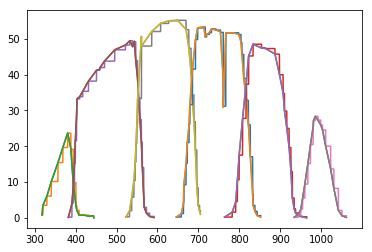

In [300]:
filters = filterExtraction(grain = 0.1)
#filters[1][0] = [x/100 for x in spectrum[]]

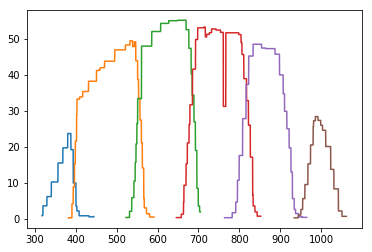

In [301]:
for x in range(6):
    plt.plot(filters[0][x],filters[1][x])
plt.show()

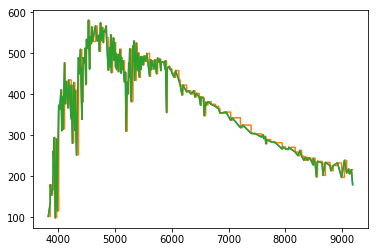

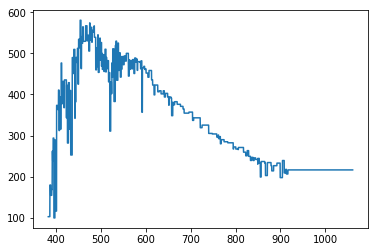

In [324]:
spectrum = filterExtraction(filters=['ktype.txt'],grain=0.1)
spectrum[0][0] = [x/10 for x in spectrum[0][0]]
for x in range(len(filters[0][5])):
    if spectrum[0][0][-1] < filters[0][5][x]:
        spectrum[0][0].append(filters[0][5][x])
        spectrum[1][0].append(spectrum[1][0][-1])
spectrum[0][0] = [round(t,int(np.log10(1/0.01))) for t in spectrum[0][0]]
plt.plot(spectrum[0][0],spectrum[1][0])
plt.show()

In [325]:
spectrum[0][0]

[382.39,
 382.4,
 382.41,
 382.42,
 382.43,
 382.44,
 382.45,
 382.46,
 382.47,
 382.48,
 382.49,
 382.5,
 382.51,
 382.52,
 382.53,
 382.54,
 382.55,
 382.56,
 382.57,
 382.58,
 382.59,
 382.6,
 382.61,
 382.62,
 382.63,
 382.64,
 382.65,
 382.66,
 382.67,
 382.68,
 382.69,
 382.7,
 382.71,
 382.72,
 382.73,
 382.74,
 382.75,
 382.76,
 382.77,
 382.78,
 382.79,
 382.8,
 382.81,
 382.82,
 382.83,
 382.84,
 382.85,
 382.86,
 382.87,
 382.88,
 382.89,
 382.9,
 382.91,
 382.92,
 382.93,
 382.94,
 382.95,
 382.96,
 382.97,
 382.98,
 382.99,
 383.0,
 383.01,
 383.02,
 383.03,
 383.04,
 383.05,
 383.06,
 383.07,
 383.08,
 383.09,
 383.1,
 383.11,
 383.12,
 383.13,
 383.14,
 383.15,
 383.16,
 383.17,
 383.18,
 383.19,
 383.2,
 383.21,
 383.22,
 383.23,
 383.24,
 383.25,
 383.26,
 383.27,
 383.28,
 383.29,
 383.3,
 383.31,
 383.32,
 383.33,
 383.34,
 383.35,
 383.36,
 383.37,
 383.38,
 383.39,
 383.4,
 383.41,
 383.42,
 383.43,
 383.44,
 383.45,
 383.46,
 383.47,
 383.48,
 383.49,
 383.5,
 383

In [326]:
convolution = [[]]*len(filters[0])
finalConvo = []
finalConvo2 = []

for x in range(len(filters[0])):
    convolution = []
    for y in range(len(filters[0][x])):
        try:
            Index = spectrum[0][0].index(filters[0][x][y])
            convolution.append(filters[1][x][y]*spectrum[1][0][Index])
        except ValueError:
            pass
    print(x)
    finalConvo.append(np.mean(convolution))
    finalConvo2.append(sum(convolution))
print(finalConvo, finalConvo2)

0
1
2
3
4
5
([1122.3066366674273, 15306.90717740232, 17083.533732654298, 11126.752123819226, 6365.133881631319, 2762.453176853039], [698074.7280071394, 31991436.0007706, 31057864.325965326, 22898855.870819934, 11807323.350426096, 3519365.3473107745])


In [328]:
m = []
for x in range(len(finalConvo2)):
    m.append(-2.5*np.log10(finalConvo2[x]/finalConvo2[2]))
    
print(m)

[4.120674181645549, -0.03215536568781016, -0.0, 0.3308945121257539, 1.0500503290727, 2.364268087268184]


200
200


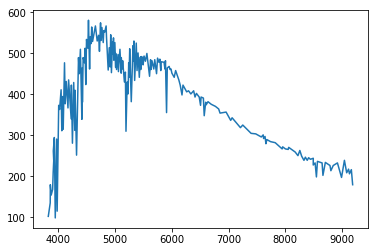

In [290]:
f = open('ktype.txt','r')
g = f.read()
gloop = g
gloopog = g
x = []
y = []
no = 0
while gloop.find('\n') != -1 and no<10000:
    no += 1
    loc1 = gloop.find(',')
    if no == 0:
        x.append((gloop[1:loc1]))
    else:
        x.append((gloop[0:loc1]))
    #append((gloopog[loc2:loc1]))
    loc2 = gloop.find('\n')
    y.append(gloop[loc1+2:loc2])
#     print(gloop[loc1+2:loc2])
#     print(gloop[loc2:])
    gloop = gloop[loc2+1:]
print(len(x))
print(len(y))
x = x[0:len(x)-1]
y = y[0:len(y)-1]
x = [float(z) for z in x]
y = [float(z) for z in y]


plt.plot(x,y)
plt.show()

In [36]:
# number = []
# filtDetailTransX = []
# for y in range(len(filtTransX)):
#     for x in range(len(filtTransX[y])):
#         if x < len(filtTransX[y])-1:
#             fillerRange = ((filtTransX[y][x+1] - filtTransX[y][x])**2)**0.5
#             filler = [0]
#             while filler[-1] < fillerRange:
#                 filler.extend([filler[-1]+0.1])
#     number.extend([len(filler)])
#     print(filtTransX[y][0])
#     print(filler)
#     filler = [z + filtTransX[y][0] for z in filler]
#     filtDetailTransX.append(filler)

# filtDetailTransY = []
# for y in range(len(filtTransY)):
#     for x in range(len(filtTransY[y])):
#         if x < len(filtTransY[y])-1:
#             fillerRange = ((filtTransY[y][x+1] - filtTransY[y][x])**2)**0.5
#             filler = [0]
#             delta = fillerRange/number[y]
#             while len(filler) < len(filtDetailTransX[y]):
#                 filler.extend([filler[-1]+delta])
                
#     filler = [z + filtTransY[y][0] for z in filler]
#     filtDetailTransY.append(filler)
# for x in range(len(filtDetailTransX)):
#     plt.plot(filtDetailTransX[x],filtDetailTransY[x])
# plt.show()

In [13]:
len(filtTransX[1])

34

In [47]:
a = 1.999
print(round(a,2))

2.0


In [258]:
x = [318.3050940320791, 320.4090018765324, 380.83882367444215, 400.99031599709616, 403.2051721067843, 408.6868382483872, 421.75407837604615, 432.6516635391127, 443.53692111715316, 444.6422945744929, 330.1395756571288, 340.91799416494314, 357.1082224992124, 368.9714684893229, 388.58054707082886, 394.28000054789266]
y = [0.7880066295012682, 3.504458476584432, 23.7156711000315, 3.484186447874862, 2.1251386853315495, 0.7652690837864782, 0.7619817277795136, 0.4573534044680656, 0.6055583711150945, 0.0015067048365295932, 6.0680482693440325, 10.140808415631383, 15.419754270138476, 19.643184900078076, 19.336365006095306, 9.976440615283465]


In [261]:
X = sorted(x)
Z = [a for _,a in sorted(zip(x,y))]

In [262]:
print(X,Z)

([318.3050940320791, 320.4090018765324, 330.1395756571288, 340.91799416494314, 357.1082224992124, 368.9714684893229, 380.83882367444215, 388.58054707082886, 394.28000054789266, 400.99031599709616, 403.2051721067843, 408.6868382483872, 421.75407837604615, 432.6516635391127, 443.53692111715316, 444.6422945744929], [0.7880066295012682, 3.504458476584432, 6.0680482693440325, 10.140808415631383, 15.419754270138476, 19.643184900078076, 23.7156711000315, 19.336365006095306, 9.976440615283465, 3.484186447874862, 2.1251386853315495, 0.7652690837864782, 0.7619817277795136, 0.4573534044680656, 0.6055583711150945, 0.0015067048365295932])


In [257]:
x

5453.2